In [1]:
import os
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Valledupar'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_pd = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

In [6]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1], "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes)),"DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes)),"GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [8]:
ghi_mensual_loc = ghi_mensual(serie_pd)
ghi_diario_loc = ghi_dia(ghi_mensual_loc)
agnos = sorted(ghi_diario_loc['AÑO'].unique())
datos_IDEAM = sorted(ghi_diario_loc["GHIdiario"])

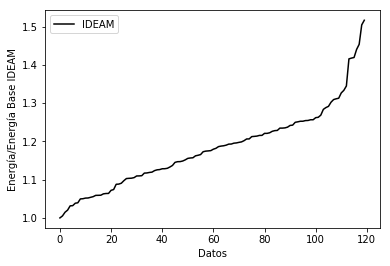

In [11]:
pylab.xlabel("Datos")
pylab.ylabel("Energía/Energía Base IDEAM")
numdatos = range(len(datos_IDEAM))
pylab.plot(numdatos,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
pylab.legend(loc='upper left')
pylab.savefig(os.path.join(output_dir,'valledupar_IDEAM.png'), dpi=600)

In [12]:
percentil = 0.01
enficc = ghi_diario_loc.quantile(q=percentil, 
                                 numeric_only=True)["GHIdiario"]
print('La ENFICC 99% es: ', enficc)

La ENFICC 99% es:  4.56900737661
